In [2]:
import psycopg2
from psycopg2 import OperationalError
from psycopg2 import sql
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import curve_fit
import seaborn as sns
from IPython.display import HTML
import webbrowser
from collections import defaultdict
import networkx as nx
import csv
import os
os.chdir('/home/francisco/MECAD/2º Ano/Estágio/forcera/scripts/scripts_py')



# LIGAÇÃO À BASE DE DADOS
conn = psycopg2.connect(
    host = "contratos-base-gov1.cf87yxnqgph8.eu-central-1.rds.amazonaws.com",
    port = 5432,
    #database = "contratosbasegov",
    user = "contratosbasegov",
    password = "8n9nyeTBFUyCcLJShNrZdPUai2KQkue4")
cur = conn.cursor()

In [2]:
cur = conn.cursor()
cur.execute('''
                SELECT cpv, concursospublicos."id", preco_contratual
                FROM concursospublicos
                ORDER BY cpv2 DESC;''')

data = pd.DataFrame(cur.fetchall())

## Inserir indicadores estatísticos na tabela <i>precoc_stat</i>

In [2]:
# GUARDAR TODAS AS COMBINAÇÕES DE CPVs COM OS 3 PRIMEIROS DÍGITOS
cur = conn.cursor()
cur.execute('''
            SELECT DISTINCT(SUBSTRING(cpv,1,3)) 
            FROM concursospublicos;''')
cpv3 = [item[0] for item in cur.fetchall()]

In [18]:
table_name = 'precoc_stat'
column_names = ['cpv3', 'preco_total', 'count', 'mean', 'std', 'min', 'q1', 'q2', 'q3', 'max']

for i in cpv3:
    cur.execute('''
                SELECT preco_contratual
                FROM concursospublicos
                WHERE SUBSTRING(cpv,1,3) = %s;
                ''', (i,))
    
    result = pd.DataFrame(cur.fetchall())
    
    if len(result > 1):
        row = list((i,result.iloc[:,0].values.sum()))
        row.extend(list(result.iloc[:, 0].describe().values))

        insert_query = sql.SQL("INSERT INTO {} ({}) VALUES ({});").format(
            sql.Identifier(table_name),
            sql.SQL(',').join(sql.Identifier(name) for name in column_names),
            sql.SQL(',').join(sql.Literal(value) for value in row)
        )
        cur.execute(insert_query)

conn.commit()

In [34]:
k = (np.random.normal(5,2,100) - np.ones(100)*5)/(np.ones(100)*2)

(array([ 1.,  2.,  7., 16., 29., 22., 16.,  5.,  1.,  1.]),
 array([-3.09827635, -2.48618131, -1.87408627, -1.26199122, -0.64989618,
        -0.03780114,  0.57429391,  1.18638895,  1.79848399,  2.41057904,
         3.02267408]),
 <BarContainer object of 10 artists>)

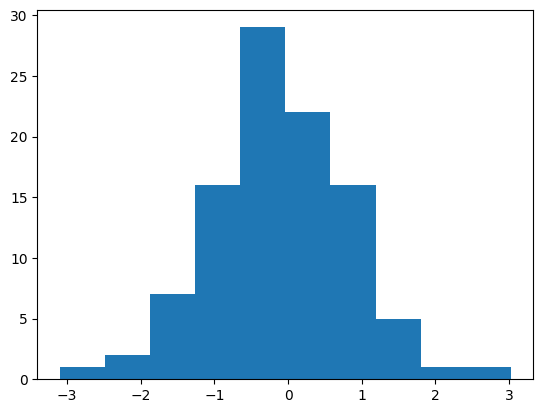

In [36]:
plt.hist(k)